In [23]:
from selenium import webdriver
from bs4 import BeautifulSoup
from time import sleep

In [24]:
driver = "./chromedriver"
browser = webdriver.Chrome(driver)

In [25]:
## Data we want Collect (Store)
Titles = []
Locations = []
Companies = []
Salary = []
JobDetails = []

In [26]:
for i in range(0, 50, 10):
    browser.get("https://www.indeed.co.in/jobs?q=machine+learning&l=India&start={}".format(i))
    sleep(2)
    while True:
        try:
            Cards = browser.find_elements_by_class_name("result")
            break
        except:
            try:
                popUp = browser.find_elements_by_id("popover-x")
                popUp.click()
            except:
                pass
                                                        
                

    for Card in Cards:
        details = BeautifulSoup(Card.get_attribute('innerHTML'), 'html.parser')
        try:
            title = details.find('a', class_ = 'jobtitle').text.replace("\n", "")
            Titles.append(title)
        except:
            Titles.append(None)

        try:
            location = details.find(class_ = 'location').text.replace("\n", "")
            Locations.append(location)
        except:
            Locations.append(None)

        try:
            company = details.find(class_ = 'company').text.replace("\n", "")
            Companies.append(company)
        except:
            Companies.append(None)


        try:
            salary = details.find(class_ = 'salary').text.replace("\n", "")
            Salary.append(salary)
        except:
            Salary.append(None)

        while True:
            try:
                Card.click()
                sleep(1)
                try:
                    Des = browser.find_element_by_id("vjs-desc")
                    DecHTML = BeautifulSoup(Des.get_attribute("innerHTML"), "html.parser")
                    all_li = DecHTML.find_all("li")
                    all_li_text = []
                    for i in all_li:
                        all_li_text.append(i.text.replace("\n", ""))
                    all_li_text = " ".join(all_li_text)
                    JobDetails.append(all_li_text)
                except:
                    JobDetails.append(None)
                break
            except:
                sleep(2)
                popUp = browser.find_elements_by_id("popover-x")
                popUp.click()
                
        

AttributeError: 'list' object has no attribute 'click'

## save data in cvs

In [27]:
import pandas as pd

In [28]:
df = pd.DataFrame({
    "Title":Titles,
    "Location":Locations,
    "Company":Companies,
    "salary":Salary,
    "Details":JobDetails,
})

ValueError: arrays must all be same length

In [29]:
df

NameError: name 'df' is not defined

In [30]:
df.to_csv["Machine_Learning_Jobs.csv"]

NameError: name 'df' is not defined

In [60]:
import pandas as pd

In [61]:
df1=pd.read_csv("ai.csv")
df2=pd.read_csv("data_analyst.csv")
df3=pd.read_csv("datascience2.csv")
df4=pd.read_csv("machinelearning.csv")

In [65]:
df = pd.concat([df1, df2, df3, df4])
df

,Unnamed: 0,Title,Location,Company,Salary,Sponsored,Description
0,0.0,Artificial Intelligence Engineer (AI Engineer),"Safdarjung Enclave, Delhi, Delhi",Timble Technologies Pvt. Ltd.,"₹30,000 - ₹40,000 a month",sponsored,NaN
1,1.0,Technical Content Curator and Writer,"Gurgaon, Haryana",Tosh Innovations Pvt. Ltd.,NaN,sponsored,NaN
2,2.0,Systems Support Analyst 4,"Bengaluru, Karnataka",Wells Fargo,NaN,sponsored,NaN
3,3.0,Software Developer,"Lucknow, Uttar Pradesh",ARDEM Data Services Private Limited,"₹1,50,000 - ₹4,00,000 a year",sponsored,NaN
4,4.0,Incident Manager,"Bengaluru, Karnataka",Nuance,NaN,NaN,NaN
...,...,...,...,...,...,...,...
787,NaN,Software Engineer - ML Applied Research,"Bengaluru, Karnataka",Fidelity Investments,None,Organic,Software Engineer - ML Applied Research\n(Job ...
788,NaN,Data Scientist,"Kochi, Kerala",Calpine Group,None,Organic,Experience : 2 - 4 year(s)\nSkills required : ...
789,NaN,Java Full Stack Developer / Core Java / HTML /...,"Bengaluru, Karnataka",SAP,None,Sponsored,Requisition ID: 218026\nWork Area: Software-De...
790,NaN,Senior Java Developer (4 to 8 years),"Mumbai, Maharashtra",HERE Technologies,None,Sponsored,What's the role?\nWe are looking for a Senior ...


In [67]:
df = df.drop_duplicates()

In [68]:
## companies who have max jobs....

In [70]:
group = df.groupby("Company").count()["Title"].sort_values(ascending=False)[:10]

In [71]:
group

Company
Micro Focus        28
Telstra            14
TARGET             13
SAP                12
Covance            11
Paypal             11
Infosys            11
Akamai             10
JP Morgan Chase    10
Wells Fargo         9
Name: Title, dtype: int64

In [72]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Company'>

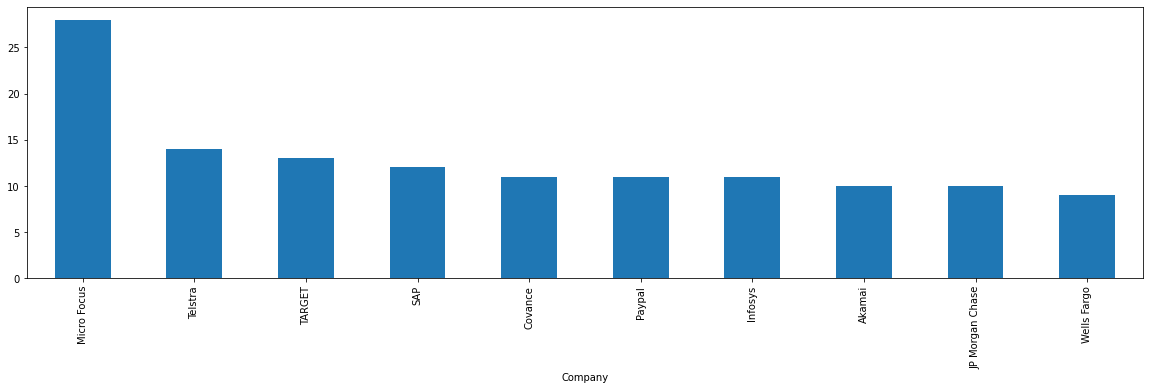

In [73]:
group.plot(kind="bar", figsize=(20,5))

In [77]:
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\anshu/nltk_data'
    - 'c:\\users\\anshu\\appdata\\local\\programs\\python\\python38\\nltk_data'
    - 'c:\\users\\anshu\\appdata\\local\\programs\\python\\python38\\share\\nltk_data'
    - 'c:\\users\\anshu\\appdata\\local\\programs\\python\\python38\\lib\\nltk_data'
    - 'C:\\Users\\anshu\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [78]:
words = word_tokenize("my name is anshuman, i am an engineeer. today is hot.")

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\anshu/nltk_data'
    - 'c:\\users\\anshu\\appdata\\local\\programs\\python\\python38\\nltk_data'
    - 'c:\\users\\anshu\\appdata\\local\\programs\\python\\python38\\share\\nltk_data'
    - 'c:\\users\\anshu\\appdata\\local\\programs\\python\\python38\\lib\\nltk_data'
    - 'C:\\Users\\anshu\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [79]:
def CleanData(desc):
    words = word_tokenize(str(desc))
    imp_word = []
    for word in words:
        lower = word.lower()
        if lower not in stop_words:
            imp_words.append(lower)
    return imp_words  

In [83]:
dfDes = df.Description.dropna()

In [85]:
tags= dfDes.apply(CleanData)

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\anshu/nltk_data'
    - 'c:\\users\\anshu\\appdata\\local\\programs\\python\\python38\\nltk_data'
    - 'c:\\users\\anshu\\appdata\\local\\programs\\python\\python38\\share\\nltk_data'
    - 'c:\\users\\anshu\\appdata\\local\\programs\\python\\python38\\lib\\nltk_data'
    - 'C:\\Users\\anshu\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [86]:
from collections import Counter

In [87]:
result = tags.apply(Counter).sum().items()

NameError: name 'tags' is not defined

In [89]:
for i in result:
    print(i)

NameError: name 'result' is not defined

In [90]:
result = sorted(result, key=lambda s:s[1], reserver = True)

NameError: name 'sample' is not defined

In [91]:
resultData = pd.Series({
    k:v for k,v in result
})

NameError: name 'result' is not defined

In [92]:
skills = ["ml","opencv", "pandas", "math", 'nltk']

In [93]:
Filter = resultData.filter(items=skills)

NameError: name 'resultData' is not defined

In [ ]:
Filter.plot(kind="bar", figsize=(10,5))